Example taken from https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

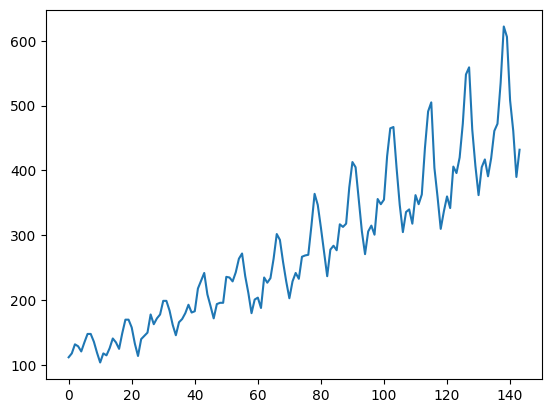

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataframe)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [11]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))# normalize to range from 0 to 1
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [100]:
# reshape into X=t and Y=t+1
look_back = 5# How many previous time steps are considered to predict the next time step
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [101]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


C:\Users\t_ziemer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 - 1s - 13ms/step - loss: 0.0450
Epoch 2/100
90/90 - 0s - 1ms/step - loss: 0.0195
Epoch 3/100
90/90 - 0s - 1ms/step - loss: 0.0113
Epoch 4/100
90/90 - 0s - 1ms/step - loss: 0.0093
Epoch 5/100
90/90 - 0s - 1ms/step - loss: 0.0080
Epoch 6/100
90/90 - 0s - 1ms/step - loss: 0.0070
Epoch 7/100
90/90 - 0s - 1ms/step - loss: 0.0061
Epoch 8/100
90/90 - 0s - 1ms/step - loss: 0.0055
Epoch 9/100
90/90 - 0s - 1ms/step - loss: 0.0050
Epoch 10/100
90/90 - 0s - 1ms/step - loss: 0.0046
Epoch 11/100
90/90 - 0s - 1ms/step - loss: 0.0044
Epoch 12/100
90/90 - 0s - 1ms/step - loss: 0.0042
Epoch 13/100
90/90 - 0s - 1ms/step - loss: 0.0041
Epoch 14/100
90/90 - 0s - 1ms/step - loss: 0.0040
Epoch 15/100
90/90 - 0s - 1ms/step - loss: 0.0039
Epoch 16/100
90/90 - 0s - 1ms/step - loss: 0.0039
Epoch 17/100
90/90 - 0s - 1ms/step - loss: 0.0038
Epoch 18/100
90/90 - 0s - 1ms/step - loss: 0.0038
Epoch 19/100
90/90 - 0s - 1ms/step - loss: 0.0037
Epoch 20/100
90/90 - 0s - 1ms/step - loss: 0.0037
Epoch 21/100
90/90 -

In [103]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 22.61 RMSE
Test Score: 54.44 RMSE


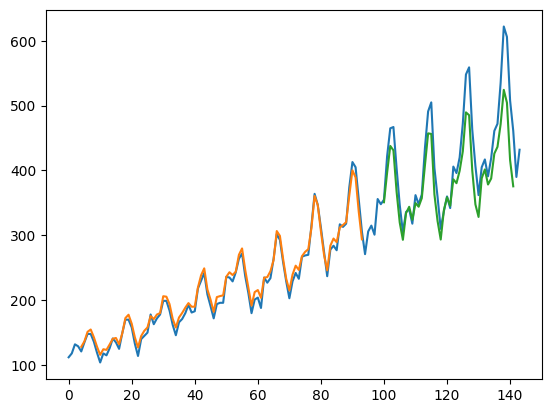

In [104]:
# we need to correct the shifting with respect to the lookback
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back-1:len(trainPredict)+look_back-1, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+2:len(dataset)-2, :] = testPredict# this has to be rewritten with respect to len(testX)
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset)-2, :] = testPredict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()